In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
df = pd.read_csv('nba.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
Name        457 non-null object
Team        457 non-null object
Number      457 non-null float64
Position    457 non-null object
Age         457 non-null float64
Height      457 non-null object
Weight      457 non-null float64
College     373 non-null object
Salary      446 non-null float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


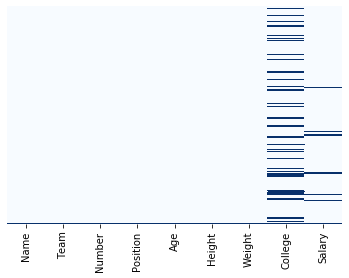

In [12]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [13]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [15]:
df.dropna(how = 'any', inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 0 to 456
Data columns (total 9 columns):
Name        364 non-null object
Team        364 non-null object
Number      364 non-null float64
Position    364 non-null object
Age         364 non-null float64
Height      364 non-null object
Weight      364 non-null float64
College     364 non-null object
Salary      364 non-null float64
dtypes: float64(4), object(5)
memory usage: 28.4+ KB


In [19]:
df['Number'] = df['Number'].astype(int)

In [21]:
df['Age'] = df['Age'].astype(int)

In [24]:
df['Weight'] = df['Weight'].astype(int)

In [26]:
df['Salary'] = df['Salary'].astype(int)

# Number of Players by Position

Text(0.5, 1.0, 'Players By Position')

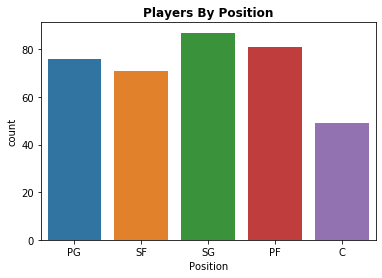

In [28]:
sns.countplot(x = df['Position'])
plt.title('Players By Position', fontdict = {'fontweight': 'bold'})

# Top 10 Tallest Players in NBA League

In [52]:
tall = df.sort_values('Height', ascending = False).head(10)

In [53]:
names = tall['Name']
values = tall['Height']

Text(0, 0.5, 'Players')

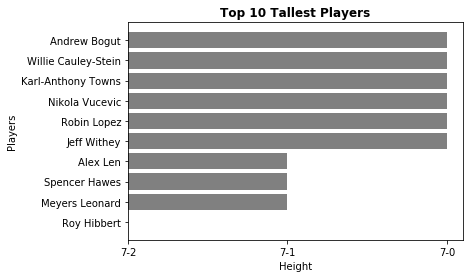

In [55]:
plt.barh(names,values,  color = 'grey')
plt.title('Top 10 Tallest Players', fontdict = {'fontweight': 'bold'})
plt.xlabel('Height')
plt.ylabel('Players')

# Top 5 Oldest Players

In [71]:
old = df.sort_values('Age', ascending = False).head(5)

In [72]:
names = old['Name']
values = old['Age']

Text(0, 0.5, 'Age')

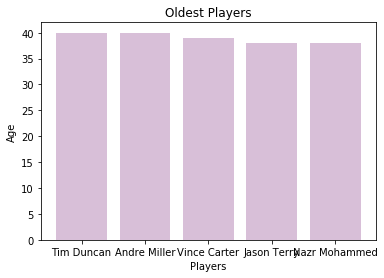

In [78]:
plt.bar(names,values, color = 'thistle')
plt.title('Oldest Players')
plt.xlabel('Players')
plt.ylabel('Age')

# Top 5 Youngest Players

In [82]:
young = df.sort_values('Age').head()

In [83]:
names = young['Name']
values = young['Age']

Text(0, 0.5, 'Players')

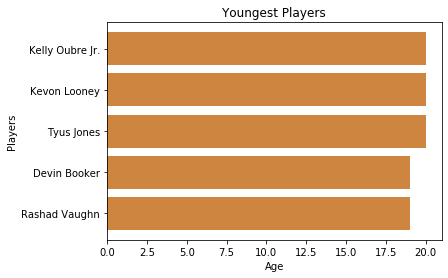

In [87]:
plt.barh(names,values, color = 'peru')
plt.title('Youngest Players')
plt.xlabel('Age')
plt.ylabel('Players')

# Total Salary by Team

In [93]:
df['Team'].nunique()

30

In [97]:
teams = df.groupby('Team')

Text(0.5, 1.0, 'Total Salary by Team - Top 5 ')

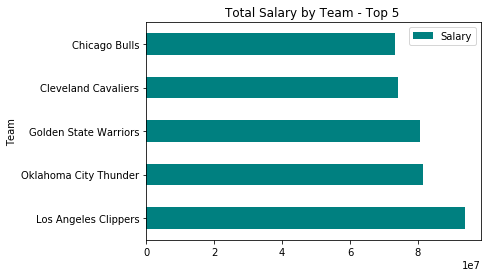

In [109]:
teams.agg({'Salary':'sum'}).sort_values('Salary', ascending = False).head(5).plot(kind = 'barh', color = 'teal')
plt.title('Total Salary by Team - Top 5 ')

# Avg Salary of Players - Distribution

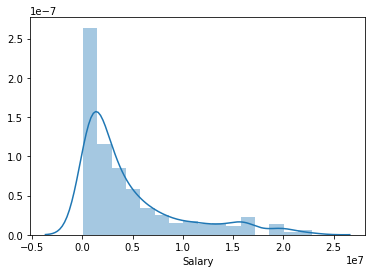

In [113]:
sns.distplot(df['Salary'])

# Top 5 Highest Paid Players

In [119]:
highest = df.sort_values('Salary', ascending = False).head(5)

In [120]:
names = highest['Name']
values = highest['Salary']

Text(0.5, 1.0, 'Highest Paid')

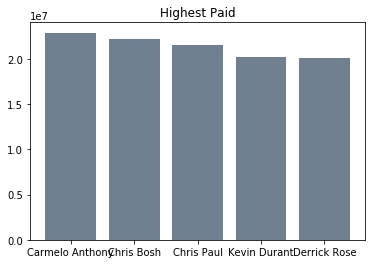

In [122]:
plt.bar(names,values, color = 'slategray')
plt.title('Highest Paid')

# Number of Players by College

Text(0.5, 1.0, 'No. of Players by Collge - Top 10')

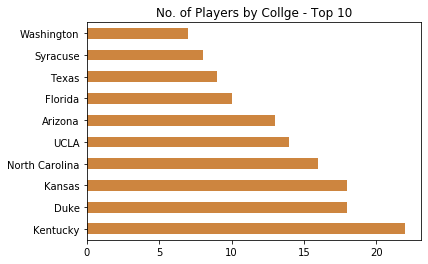

In [132]:
df['College'].value_counts().head(10).plot(kind = 'barh', color = 'peru')
plt.xlabel = 'No. of Players'
plt.ylabel = 'College'
plt.title('No. of Players by Collge - Top 10')